In [31]:
import sys
import os
import glob
import keras
import matplotlib.pyplot as plt
from skimage import transform,io
from skimage.filters import threshold_mean
import numpy as np
import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
sys.path.append('../data')

In [2]:
DATA_PATH = '../data/'
IMG_PATH = os.path.join(DATA_PATH, "extracted_images")
SYMBOL_LIST_PATH = os.path.join(DATA_PATH, "handwritten_math_symbols")

In [3]:
TARGET_IMAGE_SIZE = (32,32)

In [4]:
with open(SYMBOL_LIST_PATH) as f:
    symbols_list = f.read().split("\n")
num_classes = len(symbols_list)

In [175]:
def read_image(image_path):
    # read
    im = io.imread(a_img_path)
        
    # resize
    im = transform.resize(im, TARGET_IMAGE_SIZE, mode='symmetric', preserve_range=True)
    
    # threashold to convert it to binary
    thresh = threshold_mean(im)
    binary = im > thresh

    # binary conversion
    binary[binary == True] = 1
    binary[binary == False] = 0
    
    return binary

In [221]:
X = [] 
Y = []

for i in range(len(symbols_list)):
    for a_img_path in glob.glob(os.path.join(IMG_PATH, symbols_list[i]) + "/*.jpg"):
        
        # read
        im = io.imread(a_img_path)
        
        # resize
        im = transform.resize(im, TARGET_IMAGE_SIZE, mode='symmetric', preserve_range=True)
        
        # threashold to convert it to binary
        thresh = threshold_mean(im)
        binary = im > thresh
        
        # binary conversion
        binary[binary == True] = 1
        binary[binary == False] = 0
        
        X.append(binary)
        Y.append(i)

/home/sharmistha/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [222]:
len(X)

375974

In [223]:
Y = keras.utils.to_categorical(Y, num_classes)

In [224]:
X = np.array(X)
Y = np.array(Y)

In [237]:
X, Y = shuffle(X, Y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, shuffle=True)

In [238]:
print("X_train " + str(X_train.shape))
print("X_test " + str(X_test.shape))

X_train (263181, 32, 32)
X_test (112793, 32, 32)


In [239]:
print("y_train " + str(y_train.shape))
print("y_test " + str(y_test.shape))

y_train (263181, 83)
y_test (112793, 83)


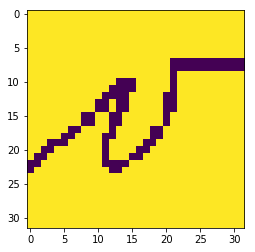

In [240]:
plt.imshow(X[90000]) 

In [241]:
for i in range(0,83):
    if Y[90000][i] == 1:
        wow = i
        break
symbols_list[wow]

'v'

In [242]:
# Model

In [254]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint

In [255]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(TARGET_IMAGE_SIZE[0],TARGET_IMAGE_SIZE[1],1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [256]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_67 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_68 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [257]:
X_train = format_train_for_keras_fit(X_train)
X_test = format_train_for_keras_fit(X_test)

In [258]:
checkpoints = ModelCheckpoint('../trained_models/model-epoch:{epoch:02d}-acc:{acc:.3f}-val_acc{val_acc:.3f}.hdf5',
                              monitor='val_acc',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=True,
                              mode='max',
                              period=1)

In [259]:
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test,y_test),
    callbacks= [checkpoints]
)

Train on 263181 samples, validate on 112793 samples
Epoch 1/10
263181/263181 [==============================] - 40s 151us/step - loss: 0.6170 - acc: 0.8346 - val_loss: 0.2129 - val_acc: 0.9360

Epoch 00001: val_acc improved from -inf to 0.93602, saving model to ../trained_models/model-epoch:01-acc:0.835-val_acc0.936.hdf5
Epoch 2/10
263181/263181 [==============================] - 40s 150us/step - loss: 0.2668 - acc: 0.9196 - val_loss: 0.1607 - val_acc: 0.9504

Epoch 00002: val_acc improved from 0.93602 to 0.95040, saving model to ../trained_models/model-epoch:02-acc:0.920-val_acc0.950.hdf5
Epoch 3/10
263181/263181 [==============================] - 39s 150us/step - loss: 0.2155 - acc: 0.9331 - val_loss: 0.1322 - val_acc: 0.9587

Epoch 00003: val_acc improved from 0.95040 to 0.95869, saving model to ../trained_models/model-epoch:03-acc:0.933-val_acc0.959.hdf5
Epoch 4/10
263181/263181 [==============================] - 40s 150us/step - loss: 0.1865 - acc: 0.9405 - val_loss: 0.1187 - val_

In [260]:
# best model seems to be: model-epoch:06-acc:0.950-val_acc0.969.hd

In [20]:
def f(img):
    img[img>0]=1
    return img

datagen = ImageDataGenerator(
    preprocessing_function=f
)

In [21]:

train_generator = datagen.flow_from_directory(
        IMG_PATH,
        classes=symbols_list,
        color_mode='grayscale',
        target_size=TARGET_IMAGE_SIZE,
        batch_size=BATCH_SIZE
)


Found 751948 images belonging to 83 classes.


In [64]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch = 751948 // BATCH_SIZE,
#         epochs=10
# )

In [81]:
def format_train_for_keras_fit(_X):
     return np.transpose(_X.reshape(len(_X), TARGET_IMAGE_SIZE[0], TARGET_IMAGE_SIZE[1], 1), axes=[0,2,1,3])

SyntaxError: invalid syntax (<ipython-input-193-ec29b05cd63f>, line 1)